# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [8]:
# Importar pandas
import pandas as pd

# 📥 Cargar el dataset 
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 1. Exploración inicial del dataset

In [9]:
import numpy as np
# Exploración de datos
# Información básica
print(df.info())
# Estadísticas básicas
print(df.describe())
# Valores nulos por columna
print(df.isnull().sum())
# Análisis sencillo de supervivencia
print(df['Survived'].mean())
# Correlaciones básicas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].corr()['Survived'].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## 🧹 2. Preprocesamiento
- Eliminar columnas irrelevantes como 'PassengerId', 'Name', 'Ticket', 'Cabin'
- Rellenar valores nulos en 'Age' y 'Embarked'
- Aplicar One Hot Encoding a 'Sex' y 'Embarked'

In [10]:
# Eliminar columnas irrelevantes como 'PassengerId', 'Name', 'Ticket', 'Cabin'
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
# Rellenar valores nulos en 'Age' y 'Embarked'
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Aplicar One Hot Encoding a 'Sex' y 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_22640\3847344584.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_22640\3847344584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

In [11]:
# Entrenar un árbol de decisión con los datos

# Separar los datos en características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)  # 'Survived' es la variable objetivo
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión, limitando la profundidad para evitar sobreajuste
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_model.predict(X_test)

## 🌳 4. Visualización del árbol

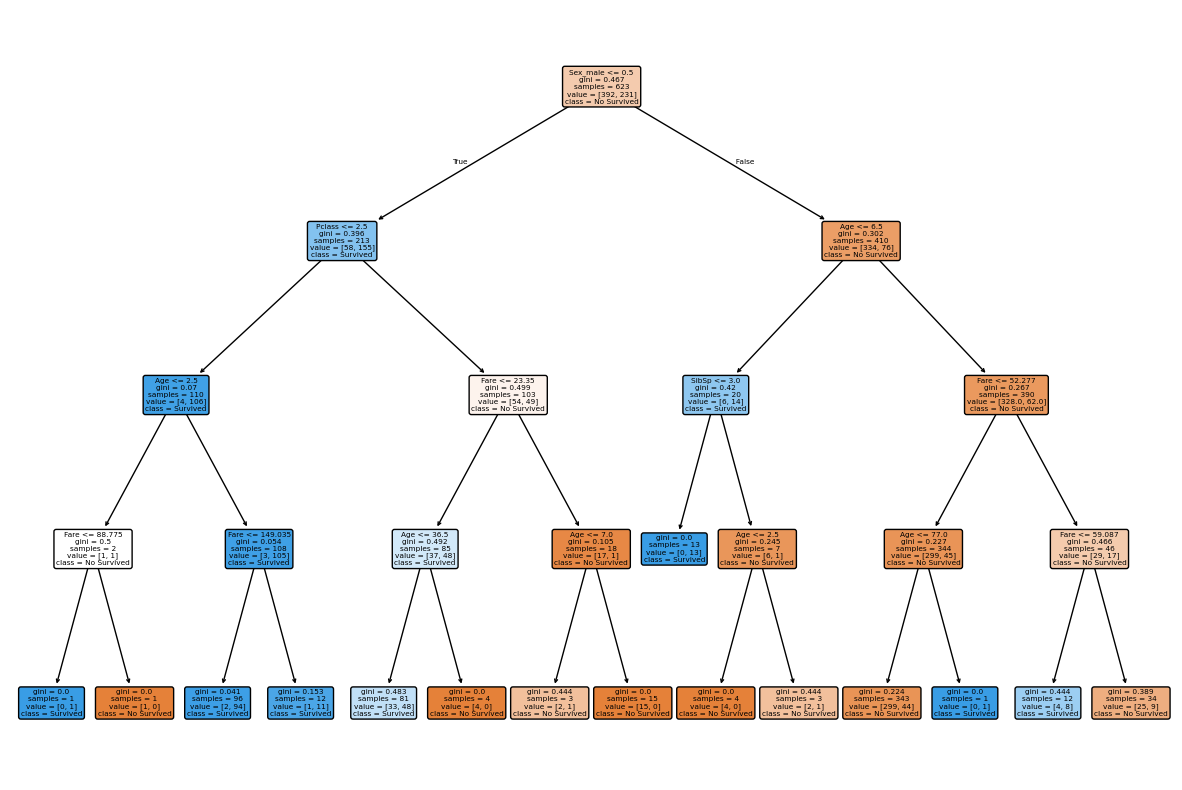

In [12]:
# Visualizar el árbol (opcional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No Survived', 'Survived'], rounded=True)
plt.show()

## 📈 5. Evaluación del modelo

In [13]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8209

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


Confusion Matrix:
[[140  17]
 [ 31  80]]


---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


In [14]:
# Escribe tu respuesta aquí...
# Sex: Es la primera variable de división en el árbol, lo que indica que tiene el mayor poder discriminatorio, siendo la supervivencia significativamente mayor para las mujeres.
# Age: Aparece en el segundo nivel del árbol para ambas ramas de sexo, sugiriendo que la edad es el segundo factor más importante. Se observa que los pasajeros más jóvenes tuvieron mayor probabilidad de sobrevivir.
# Fare: Aparece en varios nodos de decisión, indicando que el precio pagado por el boleto tiene correlación con la supervivencia.

**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

In [15]:
# Escribe tu respuesta aquí...
# Sobreajuste (overfitting): El árbol memoriza los datos de entrenamiento en lugar de generalizar patrones, creando ramas muy específicas para casos particulares.
# Poca generalización: Rendimiento pobre con datos nuevos no vistos durante el entrenamiento.
# Difícil de interpretar: Árboles muy profundos se vuelven difíciles de interpretar, perdiendo la ventaja principal de los árboles de decisión.


**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

In [ ]:
# Escribe tu respuesta aquí...
# Para variables como "Sex", la codificación ordinal implicaría una relación de orden que no existe en realidad.
# Otro error sería que el árbol interpretaría los valores ordinales como continuos, pudiendo dividir entre valores, lo que no tiene sentido para variables categóricas nominales.

**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

In [ ]:
# Escribe tu respuesta aquí...
# Agrupación de edades: Crear categorías de edad (niño, adulto, anciano) podría ser más informativo que la edad exacta.
# Ajuste de hiperparámetros: Cambiar el criterio a entropía en lugar de gini o manejar el desbalance de clases con class_weight='balanced'
# Ajuste de prioridades: Basado en el árbol, parece que 'Sex', 'Age' y 'Fare' son las más importantes. Se podría dar más peso a estas características o eliminar las menos relevantes.
# Utilización de la validación cruzada para evaluar el modelo de manera más robusta.

**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

In [ ]:
# Escribe tu respuesta aquí... 
# Los árboles de decisión son modelos simples pero poderosos que pueden ser interpretados fácilmente.
# Consideraciones técnicas:
    # Sobrejauste: los árboles de decisión son propensos al sobreajuste.
    # Manejo de datos faltantes y calidad de datos.
    # Actualización del modelo: Establecer procedimientos para reentrenar el modelo periódicamente.
    # Monitoreo de rendimiento: Implementar sistemas para detectar degradación del modelo.
    # Interpretabilidad: Asegurar que las predicciones sean comprensibles para los usuarios finales.
# Consideraciones éticas:
   # Responsabilidad: Definir quién es el responsable de las decisiones basadas en el modelo.
   # Transparencia: Comunicar claramente las limitaciones del modelo.
   # Generalización indebida: Evitar aplicar el modelo a situaciones sin antes adaptarlo a su contexto.